#                      
                        Titanic survived Project


Problem Statement:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the dataset
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


   There are 891 rows and 12 columns in the above dataset 'titanic.csv'.Passenger Id,Passenger Class,Passenger name
    Sex,age,Siblings/spouse,Parents and children ,Ticket,Fare and Embarked are the features in the dataset.
    By analysing all the above features we have to predict the predict if an arbitrary passenger on Titanic would survive the sinking or not. 



In [4]:
#To determine the shape of the dataset
df.shape

(891, 12)

In [5]:
#To find the columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [7]:
# To check null values are present or  not.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here,Null values are present. Age-177 null values,Cabin-687 null values and Embarked -2 null values.

In [8]:
#To find the data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# To replace Null value present in Age
df['Age'].fillna(df['Age'].mean(),inplace=True)

  Here,we use mean method to replace the null values in Age column.

In [10]:
#TO CHECK THE PRESENCE OF NULL VALUE
df['Age'].isnull().sum()

0

After replacing the null values by MEAN,no null values are present now.

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#To find the mode of Embarked
df['Embarked'].mode()[0]

'S'

In [14]:
#Replacing null value using MODE 
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
df=df.drop(columns='Cabin',axis =1)

Here,cabin column have 687 null values which is alot more.Hence it is enough to drop the coprresponding column than replacing those null values

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Now,no null values are present

In [19]:
#Statistical summary of the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the above Summary,
:Count will be same for all features.
:Mean and standard deviation calculated.
:We have seen minimum value Zero for some features

In [20]:
#count the number of survived ones and not
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

O -means not survived
1-survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

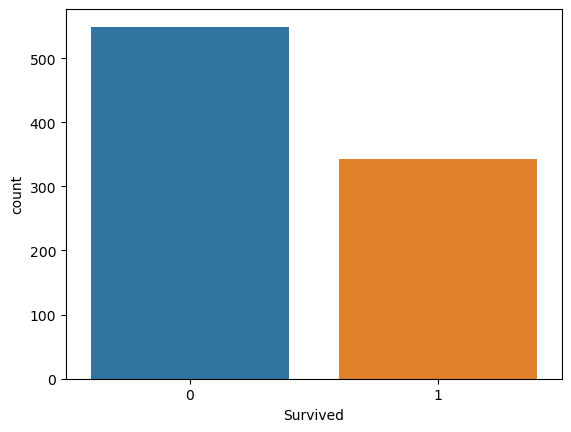

In [21]:
sns.countplot('Survived',data=df)

Those who did not survived are more than 500 and survived ones are 342.here survived ones less
compared to who did not survived.

<AxesSubplot:xlabel='Sex', ylabel='count'>

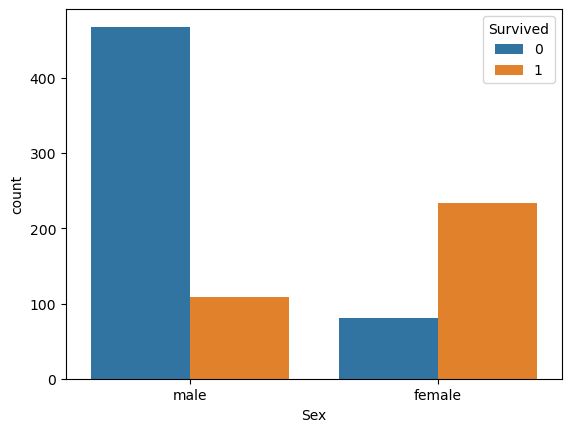

In [22]:
sns.countplot('Sex',hue='Survived',data=df)

women are thrice more likely to survive than males

<AxesSubplot:xlabel='Sex', ylabel='count'>

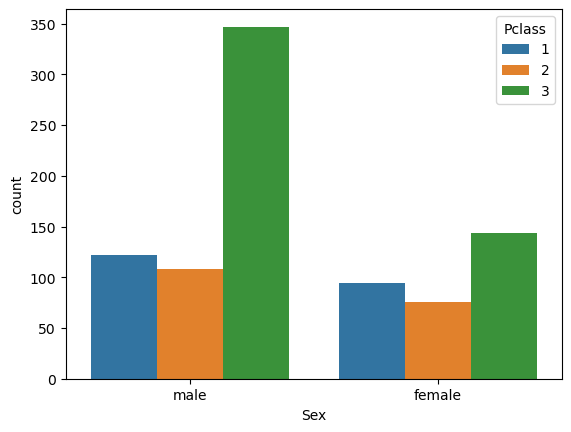

In [23]:
sns.countplot('Sex',hue='Pclass',data=df)

           #passengers who did not Survived are more in passenger class 3.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

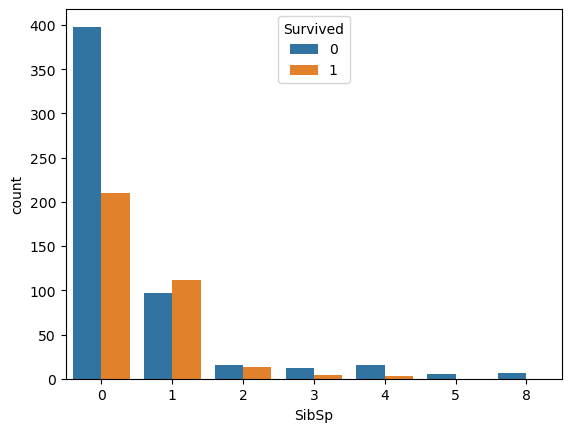

In [24]:
sns.countplot('SibSp',hue='Survived',data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

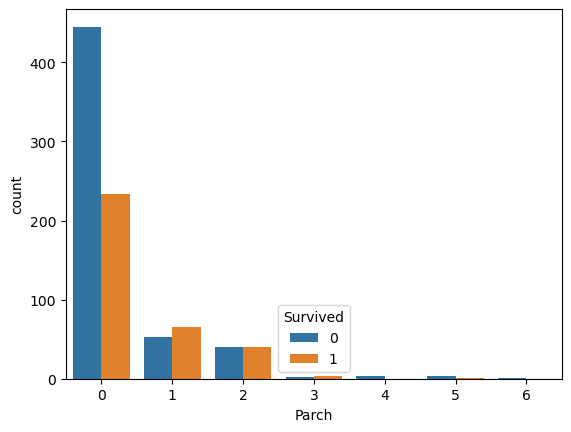

In [25]:
sns.countplot('Parch',hue='Survived',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

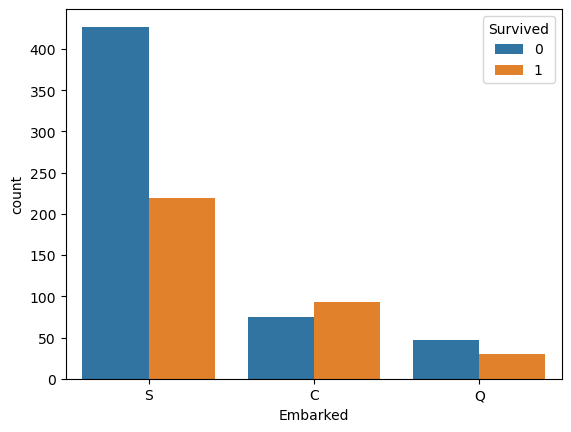

In [26]:
sns.countplot('Embarked',hue='Survived',data=df)

In [27]:
#convert male and female to numeric values 0 and 1
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1}).astype(int)

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C


In [29]:
# Embarked Port of Embarkation (S = Southampton to 0, Q = Queenstown to 1,C = Cherbourg to 2; )
df['Embarked'] = df['Embarked'].replace({'S': 0, 'Q': 1,'C':2}).astype(int)
#we have to convert Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown;
#S = Southampton) to cherbourg(C) = 0,  Queenstown(Q) = 1 , Southampton(S) = 2.
#For further analysis its necessary to convert into numerical values 0  1 and 2

In [30]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,2


In [31]:
#check null values present or not
df['Fare'].isnull().sum()

0

In [32]:
 # Lets analyse features via barplot 

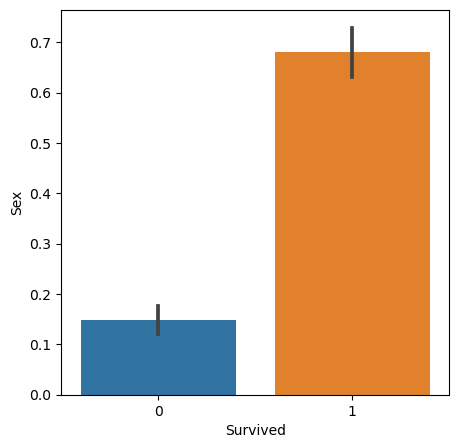

In [33]:
plt.figure(figsize=(5,5))
sns.barplot(x='Survived',y='Sex',data=df)
plt.show()

      women are more likely to survive than males in the above plot

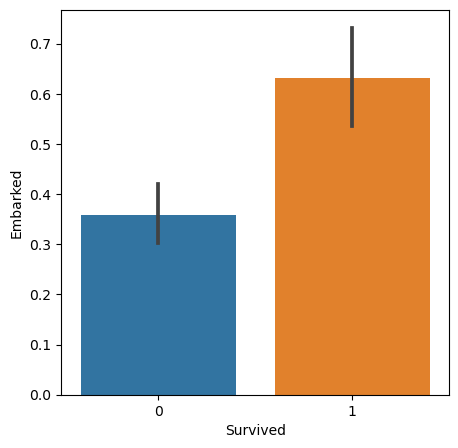

In [34]:
plt.figure(figsize=(5,5))
sns.barplot(x='Survived',y='Embarked',data=df)
plt.show()

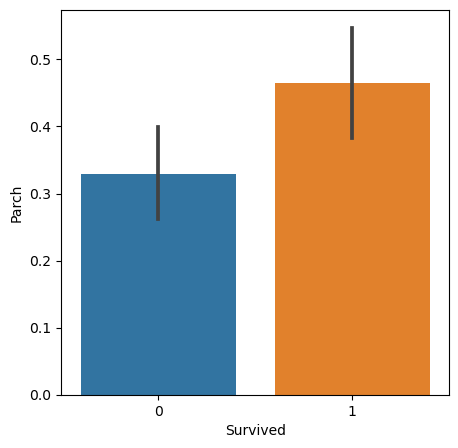

In [35]:
plt.figure(figsize=(5,5))
sns.barplot(x='Survived',y='Parch',data=df)
plt.show()

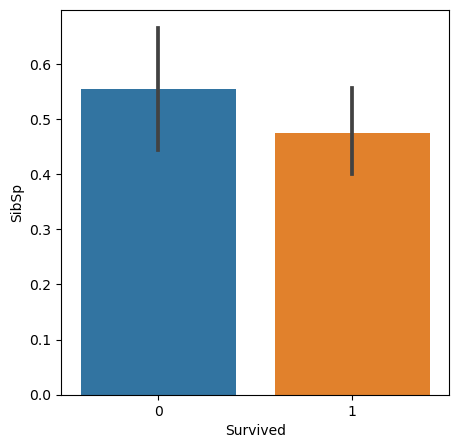

In [36]:
plt.figure(figsize=(5,5))
sns.barplot(x='Survived',y='SibSp',data=df)
plt.show()

       #Histogram

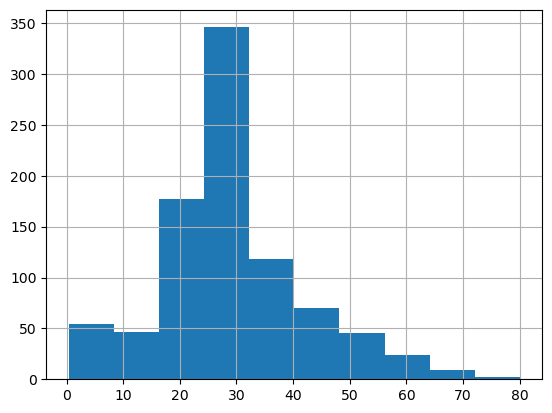

In [37]:
x=df['Age'].hist(bins=10)

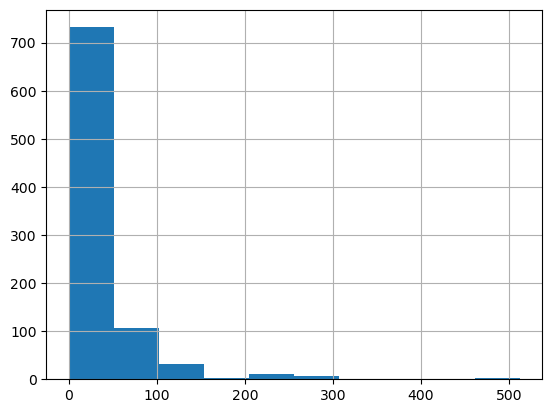

In [38]:
x=df['Fare'].hist(bins=10)

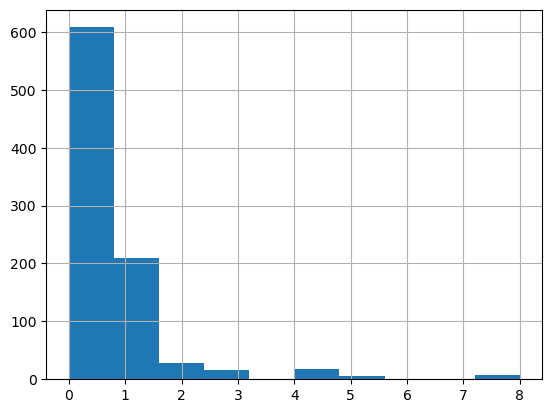

In [39]:
x=df['SibSp'].hist(bins=10)

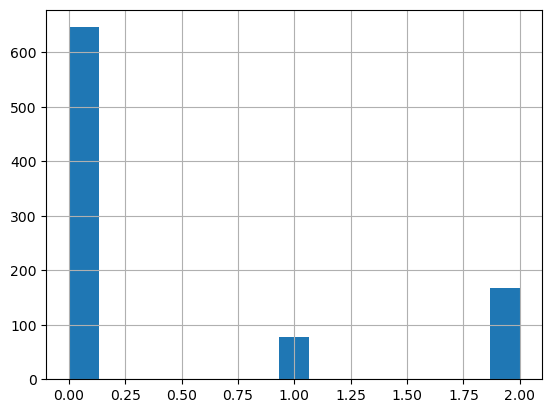

In [40]:
x=df['Embarked'].hist(bins=15)

In [41]:
df.drop(columns='Name',axis=1,inplace=True)

In [42]:
df.drop(columns='Ticket',axis=1,inplace=True)

In [43]:
X=df.drop(columns='Survived',axis =1)
Y=df['Survived']

In [44]:
print(X)

     PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0              1       3    0  22.000000      1      0   7.2500         0
1              2       1    1  38.000000      1      0  71.2833         2
2              3       3    1  26.000000      0      0   7.9250         0
3              4       1    1  35.000000      1      0  53.1000         0
4              5       3    0  35.000000      0      0   8.0500         0
..           ...     ...  ...        ...    ...    ...      ...       ...
886          887       2    0  27.000000      0      0  13.0000         0
887          888       1    1  19.000000      0      0  30.0000         0
888          889       3    1  29.699118      1      2  23.4500         0
889          890       1    0  26.000000      0      0  30.0000         2
890          891       3    0  32.000000      0      0   7.7500         1

[891 rows x 8 columns]


In [45]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Spliting the data in to train and test data

In [46]:
#Training Testing and Spliting the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [47]:
#Using LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7686567164179104
